# Running through all data preprocessing 

The purpose of this notebook is to run through all data preprocessing to be a 100% sure what data we are using when we are using. 

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import time
import matplotlib.pyplot as plt
from geopy import distance
from sklearn.cluster import DBSCAN
import time
import re
import folium
from matplotlib.ticker import MaxNLocator
from tqdm.notebook import tqdm
from IPython.display import display
cmap = plt.cm.bone


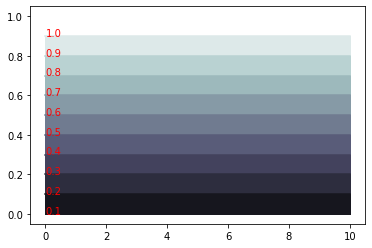

In [2]:
#define x and y values
x = np.arange(11)
y = np.zeros(11)

for i in range(10,0, -1):
    
    crat = i/10
    
    plt.plot(x, y + crat, color = cmap(crat))
    plt.fill_between(x, y + crat, color=cmap(crat))
    plt.text(0, crat - 0.1, str(crat), color = 'red')
    
plt.show()

## IMPORT DATA

In [9]:
df = pd.read_csv('C:\\Users\\User\\OneDrive - Danmarks Tekniske Universitet\\SAS_030919\\6. Semester\\BSc\\Bachelor2021\\data\\ChargePoint Data CY20Q4.csv', low_memory = False)

In [10]:
df.head()

,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Longitude,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,County,System S/N,Model Number
0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/29/2011 20:17,PDT,7/29/2011 23:20,PDT,7/29/2011 23:20,3:03:32,1:54:03,...,-122.160309,USD,0.0,Plug Out at Vehicle,3,95124.0,3284,NaN,NaN,NaN
1,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 0:00,PDT,7/30/2011 0:02,PDT,7/30/2011 0:02,0:02:06,0:01:54,...,-122.160309,USD,0.0,Customer,4,94301.0,4169,NaN,NaN,NaN
2,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 8:16,PDT,7/30/2011 12:34,PDT,7/30/2011 12:34,4:17:32,4:17:28,...,-122.160309,USD,0.0,Plug Out at Vehicle,5,94301.0,4169,NaN,NaN,NaN
3,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 14:51,PDT,7/30/2011 16:55,PDT,7/30/2011 16:55,2:03:24,2:02:58,...,-122.160309,USD,0.0,Customer,6,94302.0,2545,NaN,NaN,NaN
4,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 18:51,PDT,7/30/2011 20:03,PDT,7/30/2011 20:03,1:11:24,0:43:54,...,-122.160309,USD,0.0,Plug Out at Vehicle,7,94043.0,3765,NaN,NaN,NaN


In [13]:
df.iloc[0]

Station Name                       PALO ALTO CA / HAMILTON #1
MAC Address                               000D:6F00:015A:9D76
Org Name                                    City of Palo Alto
Start Date                                    7/29/2011 20:17
Start Time Zone                                           PDT
End Date                                      7/29/2011 23:20
End Time Zone                                             PDT
Transaction Date (Pacific Time)               7/29/2011 23:20
Total Duration (hh:mm:ss)                             3:03:32
Charging Time (hh:mm:ss)                              1:54:03
Energy (kWh)                                          6.24946
GHG Savings (kg)                                        2.625
Gasoline Savings (gallons)                              0.784
Port Type                                             Level 2
Port Number                                                 2
Plug Type                                               J1772
EVSE ID 

In [11]:
df.columns

Index(['Station Name', 'MAC Address', 'Org Name', 'Start Date',
       'Start Time Zone', 'End Date', 'End Time Zone',
       'Transaction Date (Pacific Time)', 'Total Duration (hh:mm:ss)',
       'Charging Time (hh:mm:ss)', 'Energy (kWh)', 'GHG Savings (kg)',
       'Gasoline Savings (gallons)', 'Port Type', 'Port Number', 'Plug Type',
       'EVSE ID', 'Address 1', 'City', 'State/Province', 'Postal Code',
       'Country', 'Latitude', 'Longitude', 'Currency', 'Fee', 'Ended By',
       'Plug In Event Id', 'Driver Postal Code', 'User ID', 'County',
       'System S/N', 'Model Number'],
      dtype='object')

In [8]:
df['Plug Type']

0         J1772
1         J1772
2         J1772
3         J1772
4         J1772
          ...  
259410    J1772
259411    J1772
259412    J1772
259413    J1772
259414    J1772
Name: Plug Type, Length: 259415, dtype: object

In [5]:
df['Station Name'].unique()

array(['PALO ALTO CA / HAMILTON #1', 'PALO ALTO CA / HAMILTON #2',
       'PALO ALTO CA / HIGH #4', 'PALO ALTO CA / BRYANT #2',
       'PALO ALTO CA / BRYANT #1', 'PALO ALTO CA / MPL #4',
       'PALO ALTO CA / MPL #6', 'PALO ALTO CA / MPL #2',
       'PALO ALTO CA / MPL #1', 'PALO ALTO CA / MPL #5',
       'PALO ALTO CA / MPL #3', 'PALO ALTO CA / RINCONADA LIB 2',
       'PALO ALTO CA / RINCONADA LIB 1', 'PALO ALTO CA / RINCONADA LIB 3',
       'PALO ALTO CA / WEBSTER #1', 'PALO ALTO CA / HIGH #1',
       'PALO ALTO CA / WEBSTER #2', 'PALO ALTO CA / TED THOMPSON #1',
       'PALO ALTO CA / CAMBRIDGE #1', 'PALO ALTO CA / BRYANT #3',
       'PALO ALTO CA / WEBSTER #3', 'PALO ALTO CA / CAMBRIDGE #2',
       'PALO ALTO CA / HIGH #2', 'PALO ALTO CA / HIGH #3',
       'PALO ALTO CA / BRYANT #6', 'PALO ALTO CA / BRYANT #4',
       'PALO ALTO CA / BRYANT #5', 'PALO ALTO CA / TED THOMPSON #4',
       'PALO ALTO CA / TED THOMPSON #3', 'PALO ALTO CA / CAMBRIDGE #5',
       'PALO ALTO CA / TED TH

# Separate functions 

### Time

In [85]:
def timedelta_duration(time): #There's 22 instances where Total Duration > 24hrs -> we cant use datetime as originally done
    time1 = time.replace(':0', ':')
    h = time1.split(':')[0]
    m = time1.split(':')[1]
    s = time1.split(':')[2]
    
    td = dt.timedelta(hours = int(h), minutes = int(m), seconds = int(s))
    
    return td

In [86]:
def time_converter(df): #Creates datetimes in relevant columns 
    df["Start Date"]=pd.to_datetime(df["Start Date"],format="%m/%d/%Y %H:%M", errors="coerce")
    df["End Date"]=pd.to_datetime(df["End Date"],format="%m/%d/%Y %H:%M", errors="coerce")
    df['Transaction Date (Pacific Time)']=pd.to_datetime(df['Transaction Date (Pacific Time)'],format="%m/%d/%Y %H:%M", errors="coerce")
    
    df["Total Duration (hh:mm:ss)"] = df["Total Duration (hh:mm:ss)"].apply(timedelta_duration)
    df["Charging Time (hh:mm:ss)"] = df["Charging Time (hh:mm:ss)"].apply(timedelta_duration)
    
    df["End Date"][df["End Date"].isna()] = df['Start Date'][df["End Date"].isna()] + df["Total Duration (hh:mm:ss)"][df["End Date"].isna()] #There's 40 instances of this
    
    #df["Total Duration (hh:mm:ss)"]=pd.to_datetime(df["Total Duration (hh:mm:ss)"],format="%H:%M:%S", errors="coerce") # - dt.datetime(1900, 1, 1))
    #df["Charging Time (hh:mm:ss)"]=pd.to_datetime(df["Charging Time (hh:mm:ss)"],format="%H:%M:%S", errors="coerce") #- dt.datetime(1900, 1, 1))
    
    return df

In [87]:
def fix_UTC(df): #Fixes instances whith timezone UTC
    #df['Start Date'][(df['Start Time Zone'] == 'UTC') | (df['End Time Zone'] == 'UTC')] = df['Transaction Date (Pacific Time)'] - (df['Total Duration (hh:mm:ss)'] - dt.datetime(1900, 1, 1)).round('1min')
    df['Start Date'][(df['Start Time Zone'] == 'UTC') | (df['End Time Zone'] == 'UTC')] = df['Transaction Date (Pacific Time)'] - df['Total Duration (hh:mm:ss)']
    
    
    df['End Date'][(df['Start Time Zone'] == 'UTC') | (df['End Time Zone'] == 'UTC')] = df['Transaction Date (Pacific Time)']
    #df['Transaction Date (Pacific Time)'][(df['Start Time Zone'] == 'UTC') | (df['End Time Zone'] == 'UTC')].isnull().sum()
    #There are instances where 'Transaction Date (Pacific Time)' is a NaN but luckily none that will affect the above function 
    return df

In [88]:
def duration_times_to_float(df): #Turns duration times into minutes (floats)
    df["Charging Time (hh:mm:ss)"] = df["Charging Time (hh:mm:ss)"].apply(lambda td: td.total_seconds() / 60)
    df["Total Duration (hh:mm:ss)"]=df["Total Duration (hh:mm:ss)"].apply(lambda td: td.total_seconds() / 60)
    df = df.rename(columns={'Charging Time (hh:mm:ss)': 'Charging Time (mins)', 'Total Duration (hh:mm:ss)': 'Total Duration (mins)'})
    
    
    #df["Charging Time (hh:mm:ss)"] = df["Charging Time (hh:mm:ss)"].total_seconds() / 60
    #df["Total Duration (hh:mm:ss)"]=df["Total Duration (hh:mm:ss)"].total_seconds() / 60
    
    #df["Charging Time (hh:mm:ss)"]=df["Charging Time (hh:mm:ss)"].dt.hour *60 + df["Charging Time (hh:mm:ss)"].dt.minute + df["Charging Time (hh:mm:ss)"].dt.second/60
    #df["Total Duration (hh:mm:ss)"]=df["Total Duration (hh:mm:ss)"].dt.hour *60 + df["Total Duration (hh:mm:ss)"].dt.minute + df["Total Duration (hh:mm:ss)"].dt.second/60
    return df

### Currency

In [89]:
def currency_converter(df):
    #print(df['Currency'].unique())
    #print(df[(df['Currency'] == 'EUR') & df['Fee'] != 0])
    #print(df[(df['Currency'] == 'MXN') & df['Fee'] != 0])
    #print(df[(df['Currency'] == 'CAD') & df['Fee'] != 0])
    df['Fee'][(df['Currency'] == 'EUR') & df['Fee'] != 0] = df['Fee'][(df['Currency'] == 'EUR') & df['Fee'] != 0] * ((1.18 + 1.18)/2)
    df['Fee'][(df['Currency'] == 'MXN') & df['Fee'] != 0] = df['Fee'][(df['Currency'] == 'MXN') & df['Fee'] != 0] * ((0.06 + 0.06)/2)
    #There are very few instances where there is a fee and the currency is not USD - actually just 4 
    #(and to be honest they might actually also be in USD, that would make better sence for the MXN cost but we'll trust them in this case)
    #Since the occurences lies really close in time these 2x2 are accounted for by taking a mean of the exchange rates (they're actually the same) for the given days
    #Exchange rates are found at https://fxtop.com/en/historical-currency-converter.php?A=1&C1=MXN&C2=USD&DD=08&MM=08&YYYY=2014&B=1&P=&I=1&btnOK=Go%21
    df = df.rename(columns = {'Fee': 'Fee (USD)'}) #Just so we know they've been converted 

    return df 

### Correcting MAC Address

In [90]:
def correcting_MAC(df): 
    df['MAC Address'] = df['MAC Address'].str.replace(":", "")
    return df 

### Drop data 

In [91]:
def data_drop(df): #Actually rather what to *keep*
    df = df[['Station Name', 'MAC Address', 'Start Date', 'End Date', 'Total Duration (mins)', 'Charging Time (mins)', 
             'Energy (kWh)', 'Port Number', 'Plug Type', 'Latitude', 'Longitude', 'Fee (USD)']]
    return df

In [92]:
def no_2020(df): 
    df_no2020 = df[(df['Start Date'].dt.year < 2020) & (df['End Date'].dt.year < 2020)]
    return df_no2020

In [93]:
df = time_converter(df)
df = fix_UTC(df)
df = duration_times_to_float(df)
df = currency_converter(df)
df = correcting_MAC(df)
df = data_drop(df)


In [16]:
df['Start Date'].max()

Timestamp('2020-12-31 18:19:00')

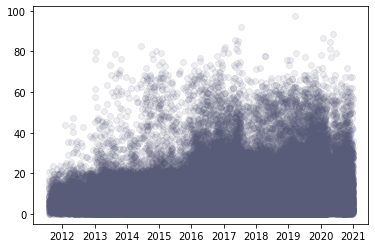

In [98]:
plt.scatter(df['Start Date'], df['Energy (kWh)'], color = cmap(0.4), alpha = 0.1)
plt.show()

In [ ]:
df = no_2020(df)

### Grouping MAC Addresses and assigning labels 

In [46]:
#Is there a mac that changes name?
#NB this has to be run after cleaning the MACS 

macs = list(df['MAC Address'].unique())
for mac in macs: 
    names = df[df['MAC Address'] == mac]['Station Name'].unique()
    if len(names) > 1: 
        print(mac)
        print(names)

000D6F00009ED39E
['PALO ALTO CA / HAMILTON #2' 'PALO ALTO CA / BRYANT #3']


So that one actually changes name.... 

In [47]:
df[df['MAC Address'] == '000D6F00009ED39E'][['Station Name','Latitude', 'Longitude']].drop_duplicates()

,Station Name,Latitude,Longitude
10,PALO ALTO CA / HAMILTON #2,37.444607,-122.160263
53956,PALO ALTO CA / BRYANT #3,37.446583,-122.162109


And location.... 
Let's call the latter '000D6F00009ED39E_XXX' so that it actually is two stations... 

In [48]:
print(df[(df['MAC Address'] == '000D6F00009ED39E') & (df['Station Name'] == 'PALO ALTO CA / HAMILTON #2')]['Start Date'].min())
print(df[(df['MAC Address'] == '000D6F00009ED39E') & (df['Station Name'] == 'PALO ALTO CA / BRYANT #3')]['Start Date'].min())

2011-08-02 12:26:00
2016-01-14 11:57:00


So BRYANT is the latter. 

In [49]:
df['MAC Address'][df['Station Name'] =='PALO ALTO CA / BRYANT #3'] = '000D6F00009ED39E_BRYANT'

In [50]:
def label_generator(df):
    df['Label'] = 'x'
    snames = df['Station Name'].unique()
    snames = np.sort(snames)
    s2 = set()
    for s in snames:
        s = s.replace('PALO ALTO CA / ', '')
        s = s.replace('#', '')
        s = re.sub(r'\d+', '',s)
        s = s.replace('T  ', 'T ')
        
        s2.add(s)
    s2 = list(s2)
    s2 = np.sort(s2)    
    print(s2)
    
    for cluster, string in enumerate(s2):
        #print(cluster)
        #print(string)
        df['Label'][df['Station Name'].str.contains(string)] = cluster
        #print(df['Label'][df['Station Name'].str.contains(s2[i])])
        #print(f"Observations: {len(df['Label'][df['Station Name'].str.contains(string)])}")
    #df = df.drop(columns = ['Station Name'])
    
    nr_labels = len(df['Label'].unique())
    
    df["CenterLat"] = 'x'
    df["CenterLon"] = 'x'
    
    for i in range(nr_labels):
        df["CenterLat"][df["Label"]==i] = df["Latitude"][df["Label"]==i].mean()
        df["CenterLon"][df["Label"]==i]=df["Longitude"][df["Label"]==i].mean()
    
    return df

In [51]:
#df = time_converter(df)
#df = fix_UTC(df)
#df = duration_times_to_float(df)
#df = currency_converter(df)
#df = correcting_MAC(df)
#df = data_drop(df)
#df = no_2020(df)
df = label_generator(df)

['BRYANT ' 'CAMBRIDGE ' 'HAMILTON ' 'HIGH ' 'MPL ' 'RINCONADA LIB '
 'TED THOMPSON ' 'WEBSTER ']


In [52]:
df.head()

,Station Name,MAC Address,Start Date,End Date,Total Duration (mins),Charging Time (mins),Energy (kWh),Port Number,Plug Type,Latitude,Longitude,Fee (USD),Label,CenterLat,CenterLon
0,PALO ALTO CA / HAMILTON #1,000D6F00015A9D76,2011-07-29 20:17:00,2011-07-29 23:20:00,183.533333,114.050000,6.249457,2,J1772,37.444572,-122.160309,0.0,2,37.4445,-122.16
1,PALO ALTO CA / HAMILTON #1,000D6F00015A9D76,2011-07-30 00:00:00,2011-07-30 00:02:00,2.100000,1.900000,0.106588,2,J1772,37.444572,-122.160309,0.0,2,37.4445,-122.16
2,PALO ALTO CA / HAMILTON #1,000D6F00015A9D76,2011-07-30 08:16:00,2011-07-30 12:34:00,257.533333,257.466667,14.951777,2,J1772,37.444572,-122.160309,0.0,2,37.4445,-122.16
3,PALO ALTO CA / HAMILTON #1,000D6F00015A9D76,2011-07-30 14:51:00,2011-07-30 16:55:00,123.400000,122.966667,7.159643,2,J1772,37.444572,-122.160309,0.0,2,37.4445,-122.16
4,PALO ALTO CA / HAMILTON #1,000D6F00015A9D76,2011-07-30 18:51:00,2011-07-30 20:03:00,71.400000,43.900000,1.957765,2,J1772,37.444572,-122.160309,0.0,2,37.4445,-122.16


In [53]:
df.tail()

,Station Name,MAC Address,Start Date,End Date,Total Duration (mins),Charging Time (mins),Energy (kWh),Port Number,Plug Type,Latitude,Longitude,Fee (USD),Label,CenterLat,CenterLon
239311,PALO ALTO CA / BRYANT #3,000D6F00009ED39E_BRYANT,2019-12-31 18:36:00,2019-12-31 19:34:00,57.933333,57.750000,5.674,2,J1772,37.446583,-122.162109,1.31,0,37.4466,-122.162
239312,PALO ALTO CA / HAMILTON #1,000D6F00015A9D76,2019-12-31 18:56:00,2019-12-31 20:32:00,96.333333,96.000000,8.926,2,J1772,37.444489,-122.160370,2.05,2,37.4445,-122.16
239314,PALO ALTO CA / TED THOMPSON #3,0024B10000029F81,2019-12-31 19:43:00,2019-12-31 20:57:00,74.250000,73.900000,6.160,1,J1772,37.428623,-122.144043,1.42,6,37.4284,-122.144
239315,PALO ALTO CA / HIGH #3,0024B10000025939,2019-12-31 20:01:00,2019-12-31 21:12:00,71.133333,70.866667,7.046,1,J1772,37.443443,-122.163139,1.62,3,37.4434,-122.163
239317,PALO ALTO CA / WEBSTER #1,0024B10000024233,2019-12-31 21:33:00,2019-12-31 21:41:00,8.083333,5.400000,0.186,1,J1772,37.448284,-122.158272,0.04,7,37.4484,-122.158


In [54]:
df[['Station Name', 'Label']].drop_duplicates().sort_values('Label')

,Station Name,Label
128095,PALO ALTO CA / BRYANT #5,0
390,PALO ALTO CA / BRYANT #2,0
414,PALO ALTO CA / BRYANT #1,0
128091,PALO ALTO CA / BRYANT #4,0
128088,PALO ALTO CA / BRYANT #6,0
53956,PALO ALTO CA / BRYANT #3,0
157829,PALO ALTO CA / CAMBRIDGE #4,1
157656,PALO ALTO CA / CAMBRIDGE #5,1
53973,PALO ALTO CA / CAMBRIDGE #2,1
53953,PALO ALTO CA / CAMBRIDGE #1,1


### Saving the cleaned data as df_ddmmyyy.csv

In [55]:
df.to_csv('df_11052021.csv')

# Available plugs at cluster for a given time (plugdf)

In [56]:
#Just a controlling aid 
labels = df['Label'].unique()
labels = np.sort(labels)
for l in labels: 
    print(f"Cluster {l}:\n")
    labelmac = df[df['Label'] == l]['MAC Address'].unique()
    for m in labelmac: 
        sdate = df[(df['Label'] == l) & (df['MAC Address'] == m)]['Start Date'].min().date()
        edate = df[(df['Label'] == l) & (df['MAC Address'] == m)]['End Date'].max().date()
        plugnr = len(df[(df['Label'] == l) & (df['MAC Address'] == m)]['Port Number'].unique())

        Ptype = df[(df['Label'] == l) & (df['MAC Address'] == m)]['Plug Type'].unique()
        
        print(f"{m} is used {sdate} to {edate} and has {plugnr} plug(s) of type {Ptype}")
    print(' ')

Cluster 0:

000D6F0000A2108E is used 2011-10-10 to 2014-09-17 and has 2 plug(s) of type ['J1772' 'NEMA 5-20R']
000D6F0000A20D9E is used 2011-10-13 to 2016-06-16 and has 2 plug(s) of type ['J1772' 'NEMA 5-20R']
000D6F00009DCFC3 is used 2013-10-03 to 2019-12-31 and has 2 plug(s) of type ['J1772' 'NEMA 5-20R']
000D6F00009ED39E_BRYANT is used 2016-01-14 to 2019-12-31 and has 2 plug(s) of type ['J1772' 'NEMA 5-20R']
000D6F00009D9A1B is used 2016-06-20 to 2019-12-31 and has 2 plug(s) of type ['NEMA 5-20R' 'J1772']
0024B10000026B43 is used 2017-07-05 to 2019-12-31 and has 2 plug(s) of type ['J1772']
0024B10000026D37 is used 2017-07-05 to 2019-12-31 and has 2 plug(s) of type ['J1772']
0024B10000026D51 is used 2017-07-05 to 2019-12-31 and has 2 plug(s) of type ['J1772']
 
Cluster 1:

0024B10000021329 is used 2016-01-14 to 2019-12-31 and has 2 plug(s) of type ['J1772']
0024B100000213B7 is used 2016-01-14 to 2019-12-31 and has 2 plug(s) of type ['J1772']
0024B10000029B7F is used 2018-03-21 to 201

Note! There are no MAC Addresses that only has 'NEMA 5-20R'. 

AND! More importantly, if one MAC has both it has one of each. 

In [75]:
def plugs_at_cluster(df): 
    labels = df['Label'].unique()
    labels = np.sort(labels)
    plugdf = pd.DataFrame() #pd.DataFrame(index = pd.date_range(start =df['Start Date'].min().date(), end = df['End Date'].max().date(), freq = 'D'))
#plugdf['Label'] = np.nan
    for l in labels: 
        #print(f"Cluster {l}:\n")
        labelmac = df[df['Label'] == l]['MAC Address'].unique()
        lplugdf = pd.DataFrame(index = pd.date_range(start = df[df['Label'] == l]['Start Date'].min().date(), end = df[df['Label'] == l]['End Date'].max().date(), freq = 'D'))
        
        for m in labelmac: 
            sdate = df[(df['Label'] == l) & (df['MAC Address'] == m)]['Start Date'].min().date()
            edate = df[(df['Label'] == l) & (df['MAC Address'] == m)]['End Date'].max().date()
            
            plugnr = len(df[(df['Label'] == l) & (df['MAC Address'] == m)]['Port Number'].unique())
            plugtypes = df[(df['Label'] == l) & (df['MAC Address'] == m)]['Plug Type'].unique()
            
            MACplugdf = pd.DataFrame(index = pd.date_range(start = sdate, end = edate, freq = 'D'))
            MACplugdf[f'{m}_plugcount'] = plugnr
            #
            #print(plugtypes)
            if len(plugtypes) == 1: 
                MACplugdf[f'{m}_plugtypes'] = 0
            elif len(plugtypes) == 2: 
                MACplugdf[f'{m}_plugtypes'] = 1 #This will end up being a 'NEMA 5-20R' counter
            else: 
                print("Plan didn't work...")
            
            
            #print(f"{m} is used {sdate} to {edate} and has {plugnr} plug(s)")
            lplugdf = pd.merge(lplugdf,MACplugdf, how='left', left_index=True, right_index=True)
            #display(lplugdf.head(1))
            #print(lplugdf[~lplugdf[f'{m}_plugs'].isna()].head(2))
        #lplugdf = lplugdf.fillna(0)
        lplugdf["Plugs_raw"] = lplugdf[lplugdf.filter(like='plugcount').columns].sum(axis=1)
        
        #display(lplugdf[lplugdf.filter(like='plugcount').columns])
        #display(lplugdf[lplugdf.filter(like='plugtypes').columns])
        
        lplugdf["Number of NEMA 5-20R_raw"] = lplugdf[lplugdf.filter(like='plugtypes').columns].sum(axis=1)
         #.sum(axis = 1)#.apply(' '.join, axis=1)
        lplugdf['Label'] = l
        #display(lplugdf.head(1))
        
        totplugs = lplugdf[['Label', 'Plugs_raw', "Number of NEMA 5-20R_raw"]]
        totplugs['Plugs_raw'][-30:] = totplugs['Plugs_raw'][-30:].max() #A bit sneaky but makes sure that stations randomly not being used at the end (earlier stop date) doesn't affect nr of available stations
        
        #Fill until 2019-12-31
        
        plugdf = pd.concat([plugdf, totplugs], sort=False)
        #print(plugdf.tail(1))
    return plugdf

In [76]:
plugdf = plugs_at_cluster(df)

Those temporary spikes are seen as due to eg maintanence and therefore also as outliers. These should be removed. This is done through incredibly ugly hard-coding. 

In [77]:
plugdf['Plugs'] = plugdf['Plugs_raw']
plugdf['Number of NEMA 5-20R'] = plugdf['Number of NEMA 5-20R_raw']

#Label 0
plugdf['Plugs'][(plugdf['Label'] == 2)&(plugdf.index == '2016-01-12')] = 4
plugdf['Plugs'][(plugdf['Label'] == 2)&(plugdf.index == '2017-11-07')] = 4

#Label 1
plugdf['Plugs'][(plugdf['Label'] == 4)&(plugdf.index == '2015-08-27')] = 6

#p2['Plugs'][(p2['Label'] == 1)&(p2.index == '2016-06-17')] = 6
#p2['Plugs'][(p2['Label'] == 1)&(p2.index == '2016-06-18')] = 6
#p2['Plugs'][(p2['Label'] == 1)&(p2.index == '2016-06-19')] = 6

#Label 2
#-
#p2['Plugs'][(p2['Label'] == 2)&(p2.index == '2017-12-19')] = 8


#Label 3
plugdf['Plugs'][(plugdf['Label'] == 0)&(plugdf.index == '2016-06-17')] = 6
plugdf['Plugs'][(plugdf['Label'] == 0)&(plugdf.index == '2016-06-18')] = 6
plugdf['Plugs'][(plugdf['Label'] == 0)&(plugdf.index == '2016-06-19')] = 6

plugdf['Number of NEMA 5-20R'][(plugdf['Label'] == 0)&(plugdf.index == '2016-06-17')] = 3
plugdf['Number of NEMA 5-20R'][(plugdf['Label'] == 0)&(plugdf.index == '2016-06-18')] = 3
plugdf['Number of NEMA 5-20R'][(plugdf['Label'] == 0)&(plugdf.index == '2016-06-19')] = 3

#p2['Plugs'][(p2['Label'] == 3)&(p2.index == '2017-08-01')] = 6
#p2['Plugs'][(p2['Label'] == 3)&(p2.index == '2017-08-03')] = 6


#Label 4 
plugdf['Plugs'][(plugdf['Label'] == 7)&(plugdf.index == '2017-08-01')] = 6
plugdf['Plugs'][(plugdf['Label'] == 7)&(plugdf.index == '2017-08-03')] = 6

#Label 5 
plugdf['Plugs'][(plugdf['Label'] == 3)&(plugdf.index == '2017-12-19')] = 8

#Label 6 
#p2['Plugs'][(p2['Label'] == 6)&(p2.index == '2018-06-29')] = 8
#p2['Plugs'][(p2['Label'] == 6)&(p2.index == '2019-11-07')] = 8

#Label 7 
plugdf['Plugs'][(plugdf['Label'] == 6)&(plugdf.index == '2018-06-29')] = 8
plugdf['Plugs'][(plugdf['Label'] == 6)&(plugdf.index == '2019-11-07')] = 8


In [162]:
plugdf.index.names = ['Date']

#### Saving the available plugs at a given time-dataframe as plugdf_ddmmyyyy.csv

In [164]:
plugdf.to_csv('plugdf_11052021.csv')

# Downsampling to days

In [82]:
def proportionalsplit(s, freq="2H"):
    '''
    From StackOverflow: https://stackoverflow.com/questions/66274081/how-to-discretize-time-series-with-overspilling-durations/66280942#66280942
    '''
    st = s["Start Date"]
    etCharge = st + pd.Timedelta(minutes=s["Charging Time (mins)"])
    trCharge = pd.date_range(st.floor(freq), etCharge, freq=freq)
    etPark = st + pd.Timedelta(minutes=s["Total Duration (mins)"])
    trPark = pd.date_range(st.floor(freq), etPark, freq=freq)
    lmin = {"2H":120}
    #print(etCharge)
    #print(trCharge)
    #print(etPark)
    #print(trPark)
    
    # ratio of how numeric values should be split across new buckets
    ratioCharge = np.minimum((np.where(trCharge<st, trCharge.shift()-st, etCharge-trCharge)/(10**9*60)).astype(int), np.full(len(trCharge),lmin[freq]))
    ratioCharge = ratioCharge / ratioCharge.sum()
    #print(ratioCharge)
    ratioPark = np.minimum((np.where(trPark<st, trPark.shift()-st, etPark-trPark)/(10**9*60)).astype(int), np.full(len(trPark),lmin[freq]))
    ratioPark = ratioCharge / ratioCharge.sum()
    #print(ratioPark)
    
    return {"Start Date":trCharge, "Original Charge Duration":np.full(len(trCharge), s["Charging Time (mins)"]), 
                "Original Park Duration":np.full(len(trCharge), s["Total Duration (mins)"]), 
                "Original Start":np.full(len(trCharge), s["Start Date"]), 
                "Charging Time (mins)": s["Charging Time (mins)"] * ratioCharge,
                "Parking Time (mins)": s["Total Duration (mins)"] * ratioPark,
                "Energy (kWh)": s["Energy (kWh)"] * ratioCharge,
                "CenterLon": np.full(len(trCharge),s["CenterLon"]), "CenterLat": np.full(len(trCharge),s["CenterLat"]), 
                "Fee (USD)": s["Fee (USD)"] * ratioCharge, 
                "Label": s["Label"]
            }

In [83]:
def downsampling_to_days(df):
    labels = df["Label"].unique()
    dfClean2 = pd.DataFrame(columns = df.columns[1:])
    for label in labels:
        d = df[df["Label"] == label].resample("D", on="Start Date").agg({'Charging Time (mins)':'sum','Parking Time (mins)':'sum', 'Energy (kWh)':'sum', 'Fee (USD)':'sum', 'CenterLon':'min', 'CenterLat':'min'}).fillna('')
        d["Label"] = label
        
        dfClean2 = dfClean2.append(d)
    
    dfClean2 = dfClean2.reset_index()
    dfClean2 = dfClean2.rename(columns = {"index":"Start Date"})
    
    new_col_order = ['Start Date','Label','Charging Time (mins)','Parking Time (mins)', 'Energy (kWh)', 'Fee (USD)', 'CenterLon', 'CenterLat']
    dfClean3 = dfClean2[new_col_order]
    return dfClean3

In [84]:
start_time = time.time()
df_days = pd.concat([pd.DataFrame(v) for v in df.apply(proportionalsplit, axis=1).values]).reset_index(drop=True)
print("This bastard took", (time.time() - start_time)/60, "minutes to run...")

This bastard took 28.999026377995808 minutes to run...


In [86]:
df_days

,Start Date,Original Charge Duration,Original Park Duration,Original Start,Charging Time (mins),Parking Time (mins),Energy (kWh),CenterLon,CenterLat,Fee (USD),Label
0,2011-07-29 20:00:00,114.050000,183.533333,2011-07-29 20:17:00,103.045175,165.823977,5.646439,-122.160258,37.444544,0.000000,2
1,2011-07-29 22:00:00,114.050000,183.533333,2011-07-29 20:17:00,11.004825,17.709357,0.603018,-122.160258,37.444544,0.000000,2
2,2011-07-30 00:00:00,1.900000,2.100000,2011-07-30 00:00:00,1.900000,2.100000,0.106588,-122.160258,37.444544,0.000000,2
3,2011-07-30 08:00:00,257.466667,257.533333,2011-07-30 08:16:00,104.188846,104.215824,6.050525,-122.160258,37.444544,0.000000,2
4,2011-07-30 10:00:00,257.466667,257.533333,2011-07-30 08:16:00,120.217899,120.249027,6.981374,-122.160258,37.444544,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...
476802,2019-12-31 20:00:00,96.000000,96.333333,2019-12-31 18:56:00,32.000000,32.111111,2.975333,-122.160258,37.444544,0.683333,2
476803,2019-12-31 18:00:00,73.900000,74.250000,2019-12-31 19:43:00,17.209589,17.291096,1.434521,-122.144114,37.428422,0.330685,6
476804,2019-12-31 20:00:00,73.900000,74.250000,2019-12-31 19:43:00,56.690411,56.958904,4.725479,-122.144114,37.428422,1.089315,6
476805,2019-12-31 20:00:00,70.866667,71.133333,2019-12-31 20:01:00,70.866667,71.133333,7.046000,-122.163012,37.443428,1.620000,3


In [87]:
df_days.isna().sum()

Start Date                  0
Original Charge Duration    0
Original Park Duration      0
Original Start              0
Charging Time (mins)        6
Parking Time (mins)         6
Energy (kWh)                6
CenterLon                   0
CenterLat                   0
Fee (USD)                   6
Label                       0
dtype: int64

#### THIS IS AN UGLY FIX THAT PERHAPS INDICATES THAT THERE'S SOMETHING WEIRD WITH proportionalsplit
(But it looks alright except for 6 generated NaNs...) 

In [89]:
df_days = df_days.dropna()

#### Let's keep going

In [90]:
df_days = downsampling_to_days(df_days)
df_days.isna().sum()

Start Date              0
Label                   0
Charging Time (mins)    0
Parking Time (mins)     0
Energy (kWh)            0
Fee (USD)               0
CenterLon               0
CenterLat               0
dtype: int64

### Fill days without demand 

In [91]:
def fill_empty_days(df): 
    df = df.set_index("Start Date")
    df.index = df.index.to_period("D")
    labels = df.Label.unique()
    df_reindex = pd.DataFrame()
    idx = pd.period_range(min(df.index), max(df.index))
    for i in labels:
        #CenterLatitude = list(df[df.Label == i]['CenterLat'].unique())
        #CenterLongitude = list(df[df.Label == i]['CenterLon'].unique())
        #print(CenterLatitude)
        #print(CenterLongitude)
        
        filling = df[df.Label == i].reindex(idx, fill_value = 0)
        filling.Label = i
        filling.CenterLat = df['CenterLat'][df.Label == i][0]
        filling.CenterLon = df['CenterLon'][df.Label == i][0]

        df_reindex = df_reindex.append(filling)
        
    
    df = df_reindex.sort_index()
    
    return df 

In [92]:
df_days = fill_empty_days(df_days)
df_days.isna().sum()

Label                   0
Charging Time (mins)    0
Parking Time (mins)     0
Energy (kWh)            0
Fee (USD)               0
CenterLon               0
CenterLat               0
dtype: int64

In [93]:
df_days.head()

,Label,Charging Time (mins),Parking Time (mins),Energy (kWh),Fee (USD),CenterLon,CenterLat
2011-07-29,2,114.05,183.533333,6.249457,0.0,-122.160258,37.444544
2011-07-29,4,0.00,0.000000,0.000000,0.0,-122.113337,37.422125
2011-07-29,5,0.00,0.000000,0.000000,0.0,-122.138897,37.445497
2011-07-29,3,0.00,0.000000,0.000000,0.0,-122.163012,37.443428
2011-07-29,1,0.00,0.000000,0.000000,0.0,-122.146024,37.426246


In [94]:
df_days.to_csv('df_days_11052021.csv')

### External data
#### POIs

In [243]:
#Get POIs 
#.... And POIs within distance 
dfPOI= pd.read_csv('C:\\Users\\User\\OneDrive - Danmarks Tekniske Universitet\\SAS_030919\\6. Semester\\BSc\\Bachelor2021\\data\\createdDat\\points_of_int.csv', low_memory = False)
dfPOI = dfPOI.drop(columns = 'Unnamed: 0')

In [244]:
dfPOI.head()

,Name,Latitude,Longitude,Category,Sub Category
0,Zydeco Party,37.452546,-122.112660,Arts & Entertainment,Music Venue
1,Delta Chi Alumni,37.450602,-122.114825,College & University,Fraternity House
2,Phi Beta Pi Alumni,37.452672,-122.113965,College & University,Fraternity House
3,Delta Delta Delta Alumni,37.450842,-122.114379,College & University,Fraternity House
4,Mama's Taco Wagon,37.450386,-122.116925,Food,Food Truck


### Create dfPOI 

In [251]:
dfPOI['Category'] = pd.Categorical(POI['Category'])
dfPOI['CatCode'] = POI['Category'].cat.codes
dfPOI[['Category', 'CatCode']].drop_duplicates().sort_values('CatCode')

,Category,CatCode
0,Arts & Entertainment,0
1,College & University,1
846,Event,2
4,Food,3
232,Nightlife Spot,4
7,Outdoors & Recreation,5
15,Professional & Other Places,6
407,Residence,7
53,Shop & Service,8
63,Travel & Transport,9


In [252]:
#dfPOI.to_csv('dfPOI_11052021.csv')

## POIs within radius (250 m)

In [245]:
def distance_calc (row, label): #inspired by https://stackoverflow.com/questions/44446862/calculate-distance-between-latitude-and-longitude-in-dataframe
    POIlocation = (row['Latitude'], row['Longitude'])
    LabelX = (row['Label'+ str(label) +'_Lat'], row['Label'+ str(label) +'_Lon'])
    return distance.distance(POIlocation, LabelX).meters

In [246]:
def POIs_within_radius(df, df_poi, radius):
    #Ad-hoc solution to keep date
    df = df.reset_index() 
    df = df.rename(columns = {'index': 'Date'})
    df['Date'] = df['Date'].dt.to_timestamp('s')
    
    df_unique_label = df.groupby('Label', group_keys=False).apply(lambda df: df.sample(1))
    df_unique_label = df_unique_label[['Label','CenterLat', 'CenterLon']]
    df_unique_label = df_unique_label.set_index('Label')
    
    for i in range(len(df_unique_label)): 
        df_poi['Label' + str(i) + '_Lat'] = df_unique_label.at[i,'CenterLat']
        df_poi['Label' + str(i) + '_Lon'] = df_unique_label.at[i,'CenterLon']
    
    for j in range(len(df_unique_label)): 
        df_poi[str(j) + '_Distance'] = df_poi.apply (lambda row: distance_calc (row, j),axis=1)
    fill = pd.DataFrame()
    for k in range(len(df_unique_label)):
        m = radius 
        LabelY = pd.DataFrame(df_poi[df_poi[(str(k) + '_Distance')] < m]['Category'].value_counts())
        LabelY = LabelY.rename(columns={"Category": k})
        LabelY = LabelY.T
        fill = fill.append(LabelY)
    fill = fill.reset_index()
    fill = fill.rename(columns={"index": "Label"})
    category_names = list(fill.columns[1:])
    category_names_count = ['# ' + x for x in category_names]
    fill = fill.rename(columns = dict(zip(category_names, category_names_count)))
    
    result = df.merge(fill, on = "Label")
    # result = result.drop(columns = [# Event])
    #Ad-hoc solution to keep date
    result = result.set_index('Date')
    result = result.drop(columns = ['CenterLon', 'CenterLat'])
    return result

In [247]:
start_time = time.time()
df_days_with_external = POIs_within_radius(df_days, dfPOI, 250)
print("This bastard took", (time.time() - start_time)/60, "minutes to run...")

This bastard took 1.0524339954058328 minutes to run...


In [248]:
df_days_with_external

,Label,Charging Time (mins),Parking Time (mins),Energy (kWh),Fee (USD),# Food,# Shop & Service,# Professional & Other Places,# Nightlife Spot,# Outdoors & Recreation,# Arts & Entertainment,# Travel & Transport,# College & University,# Event,# Residence
Date,,,,,,,,,,,,,,,
2011-07-29,2,114.050000,183.533333,6.249457,0.000000,127.0,99.0,86,87.0,82,83.0,38.0,9.0,NaN,7.0
2011-07-30,2,517.200000,686.650000,28.978653,0.000000,127.0,99.0,86,87.0,82,83.0,38.0,9.0,NaN,7.0
2011-07-31,2,647.866667,725.983333,37.209163,0.000000,127.0,99.0,86,87.0,82,83.0,38.0,9.0,NaN,7.0
2011-08-01,2,95.133333,203.566667,5.041244,0.000000,127.0,99.0,86,87.0,82,83.0,38.0,9.0,NaN,7.0
2011-08-02,2,279.983333,280.316667,16.210423,0.000000,127.0,99.0,86,87.0,82,83.0,38.0,9.0,NaN,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,0,1320.766667,1501.966667,100.728000,24.500000,132.0,105.0,83,69.0,45,40.0,27.0,6.0,3.0,NaN
2019-12-28,0,545.383333,620.633333,46.182000,11.000000,132.0,105.0,83,69.0,45,40.0,27.0,6.0,3.0,NaN
2019-12-29,0,755.300000,971.516667,61.271000,15.090000,132.0,105.0,83,69.0,45,40.0,27.0,6.0,3.0,NaN


In [1]:
#df_days_POIs.isna().sum()

## Merging the data with plugdf

In [253]:
df_days_with_external = pd.merge(df_days_with_external,plugdf, how='left', left_on=['Date', 'Label'], right_on=['Date', 'Label'])

In [2]:
#plt.rcParams['figure.facecolor'] = 'white'
#fig, ax = plt.subplots()
#for l in range(len(df_days_with_external['Label'].unique())): 
#    ax.plot(df_days_with_external[df_days_with_external['Label']==l].index, df_days_with_external[df_days_with_external['Label']==l]['Plugs']+l/15, lw = 3, label = l)
#    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
#    ax.legend()
#plt.title('Plugs available at cluster for a given date')
#plt.show()

In [3]:
#plt.plot[ww[ww['Label'] == 0]['Energy (kWh)']]
#plt.show()
#la = 5
#import matplotlib
#import math
#import matplotlib.ticker as ticker
#
#for la in range(len(df_days_with_external['Label'].unique())):
#    dfla = df_days_with_external[df_days_with_external['Label'] == la]
#    dftemp = dfla[(dfla['Energy (kWh)'] != 0).cumsum() > 0]
#    dftemp.index = pd.to_datetime(dftemp.index)
#    
#    fig, ax = plt.subplots()
#    ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
#    ax.plot(dftemp.index, dftemp['Energy (kWh)'], zorder=0)
#
#    ax.set_ylabel('Energy (kWh)')
#    ax.vlines(dftemp[dftemp['Fee (USD)'] != 0].index.min(), ymin = -3, ymax = dftemp['Energy (kWh)'].max(), color = 'red', label="Fee is introduced")
#    
#    ax2 = ax.twinx() 
#    ax2.plot(dftemp.index, dftemp['Plugs'])
#    ax2.plot(dftemp.index, dftemp['Plugs_raw'], color = 'black')
#
#    ax2.plot(dftemp.index, dftemp['Number of NEMA 5-20R'], color = 'yellow')
#
#    ax2.set_ylabel('Nr of Plugs')
#    yint = range(0, math.ceil(max(dftemp['Plugs_raw']))+1) #math.floor(min(dftemp['Plugs']))
#    ax2.set_yticks(yint)
#    
#    ax2.title.set_text(f"Cluster {la}")
#    #ax2.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
#    ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y'))
#    #((ww[ww['Label'] == la]['Energy (kWh)'] - ww[ww['Label'] == la]['Energy (kWh)'].mean())/ ww[ww['Label'] == la]['Energy (kWh)'].std()).plot(label = "Standardized consumption")
#    #(ww[ww['Label'] == la]['Plugs']).plot(label = "Nr of plugs")
#    #plt.vlines(ww[ww['Fee (USD)'] != 0].index.min(), ymin = -3, ymax = ww[ww['Label'] == la]['Plugs'].max(), color = 'red', label="Fee is introduced")
#    #plt.title(f"Label: {la}")
#    #plt.legend()
#    ax.legend()
#    plt.show()

#### Theory on: 
label 0: They shift to more powerful chargers. That why there's a fluke in the nr of ports that then goes down to 4 with an increase in demand as consequence. 

Label 1: It's out of order for a while before they change it. 

Label 3: They install new chargers simultaneously as they start to take a fee. 

Label 4: Change to more powerful charger (spike 1) leads to the demand coming back. However, what made it fall? 

### One-hot encode date

In [256]:
def OneHotEncode(df):
    cluster_dummy = pd.get_dummies(df.Label, prefix="Label")
    day_month_dummy = pd.get_dummies(df.index.day, prefix="Month_Day")
    day_week_dummy = pd.get_dummies(df.index.dayofweek, prefix="Week_Day")
    month_year_dummy = pd.get_dummies(df.index.month, prefix="Year_Month")
    #Setting date as index 
    day_month_dummy = day_month_dummy.set_index(df.index)
    day_week_dummy = day_week_dummy.set_index(df.index)
    month_year_dummy = month_year_dummy.set_index(df.index)
    
    res = pd.concat([cluster_dummy,day_month_dummy,day_week_dummy,month_year_dummy], axis=1)
    df = pd.concat([df, res], axis=1)
    return df

In [257]:
df_days_with_external = OneHotEncode(df_days_with_external)

In [258]:
df_days_with_external

,Label,Charging Time (mins),Parking Time (mins),Energy (kWh),Fee (USD),# Food,# Shop & Service,# Professional & Other Places,# Nightlife Spot,# Outdoors & Recreation,...,Year_Month_3,Year_Month_4,Year_Month_5,Year_Month_6,Year_Month_7,Year_Month_8,Year_Month_9,Year_Month_10,Year_Month_11,Year_Month_12
Date,,,,,,,,,,,,,,,,,,,,,
2011-07-29,2,114.050000,183.533333,6.249457,0.000000,127.0,99.0,86,87.0,82,...,0,0,0,0,1,0,0,0,0,0
2011-07-30,2,517.200000,686.650000,28.978653,0.000000,127.0,99.0,86,87.0,82,...,0,0,0,0,1,0,0,0,0,0
2011-07-31,2,647.866667,725.983333,37.209163,0.000000,127.0,99.0,86,87.0,82,...,0,0,0,0,1,0,0,0,0,0
2011-08-01,2,95.133333,203.566667,5.041244,0.000000,127.0,99.0,86,87.0,82,...,0,0,0,0,0,1,0,0,0,0
2011-08-02,2,279.983333,280.316667,16.210423,0.000000,127.0,99.0,86,87.0,82,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,0,1320.766667,1501.966667,100.728000,24.500000,132.0,105.0,83,69.0,45,...,0,0,0,0,0,0,0,0,0,1
2019-12-28,0,545.383333,620.633333,46.182000,11.000000,132.0,105.0,83,69.0,45,...,0,0,0,0,0,0,0,0,0,1
2019-12-29,0,755.300000,971.516667,61.271000,15.090000,132.0,105.0,83,69.0,45,...,0,0,0,0,0,0,0,0,0,1


### Holidays 
Very inspired by: https://python.plainenglish.io/a-holiday-date-with-pandas-ef089f83a24

In [259]:
def days_prev_holiday(date, holidays):
    difference=[]
    for item in holidays:
        difference.append(int(str((item-date).days)))
    return abs(max([x for x in difference if x<=0]))


In [260]:
def days_next_holiday(date, holidays):
    difference=[]
    for item in holidays:
        difference.append(int(str((item-date).days)))
    return min([x for x in difference if x>=0])

In [261]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
       
def Holidays(df):
    cal = calendar()
    holidays = cal.holidays(start=df.index.min() - dt.timedelta(days = 365), end=df.index.max() + dt.timedelta(days = 365))
    df['Holiday'] = df.index.isin(holidays).astype(int)
    
    df = df.reset_index()
    
    df['Days_previous_holiday']= df.apply(lambda row: days_prev_holiday(row['Date'], holidays), axis=1)
    df['Days_next_holiday']= df.apply(lambda row: days_next_holiday(row['Date'], holidays), axis=1)
    
    df = df.set_index('Date')
    return df

In [262]:
df_days_with_external = Holidays(df_days_with_external)

In [228]:
df_days_with_external

,Label,Charging Time (mins),Parking Time (mins),Energy (kWh),Fee (USD),# Food,# Shop & Service,# Professional & Other Places,# Nightlife Spot,# Outdoors & Recreation,...,Year_Month_6,Year_Month_7,Year_Month_8,Year_Month_9,Year_Month_10,Year_Month_11,Year_Month_12,Holiday,Days_previous_holiday,Days_next_holiday
Date,,,,,,,,,,,,,,,,,,,,,
2011-07-29,2,114.050000,183.533333,6.249457,0.000000,127.0,99.0,86,87.0,82,...,0,1,0,0,0,0,0,0,25,38
2011-07-30,2,517.200000,686.650000,28.978653,0.000000,127.0,99.0,86,87.0,82,...,0,1,0,0,0,0,0,0,26,37
2011-07-31,2,647.866667,725.983333,37.209163,0.000000,127.0,99.0,86,87.0,82,...,0,1,0,0,0,0,0,0,27,36
2011-08-01,2,95.133333,203.566667,5.041244,0.000000,127.0,99.0,86,87.0,82,...,0,0,1,0,0,0,0,0,28,35
2011-08-02,2,279.983333,280.316667,16.210423,0.000000,127.0,99.0,86,87.0,82,...,0,0,1,0,0,0,0,0,29,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,0,1320.766667,1501.966667,100.728000,24.500000,132.0,105.0,83,69.0,45,...,0,0,0,0,0,0,1,0,2,5
2019-12-28,0,545.383333,620.633333,46.182000,11.000000,132.0,105.0,83,69.0,45,...,0,0,0,0,0,0,1,0,3,4
2019-12-29,0,755.300000,971.516667,61.271000,15.090000,132.0,105.0,83,69.0,45,...,0,0,0,0,0,0,1,0,4,3


In [264]:
df_days_with_external.columns

Index(['Label', 'Charging Time (mins)', 'Parking Time (mins)', 'Energy (kWh)',
       'Fee (USD)', '# Food', '# Shop & Service',
       '# Professional & Other Places', '# Nightlife Spot',
       '# Outdoors & Recreation', '# Arts & Entertainment',
       '# Travel & Transport', '# College & University', '# Event',
       '# Residence', 'Plugs_raw', 'Number of NEMA 5-20R_raw', 'Plugs',
       'Number of NEMA 5-20R', 'Label_0', 'Label_1', 'Label_2', 'Label_3',
       'Label_4', 'Label_5', 'Label_6', 'Label_7', 'Month_Day_1',
       'Month_Day_2', 'Month_Day_3', 'Month_Day_4', 'Month_Day_5',
       'Month_Day_6', 'Month_Day_7', 'Month_Day_8', 'Month_Day_9',
       'Month_Day_10', 'Month_Day_11', 'Month_Day_12', 'Month_Day_13',
       'Month_Day_14', 'Month_Day_15', 'Month_Day_16', 'Month_Day_17',
       'Month_Day_18', 'Month_Day_19', 'Month_Day_20', 'Month_Day_21',
       'Month_Day_22', 'Month_Day_23', 'Month_Day_24', 'Month_Day_25',
       'Month_Day_26', 'Month_Day_27', 'Month_Day_28

In [229]:
df_days_with_external.to_csv('df_days_with_external_11052021.csv')